<center><h1>Different Approaches towards Breast Cancer Wisconsin Diagnostic and Banknote Authentication</h1></center>

Name: Cici Chang
<br>
Github Username: cicichang11

## Overall Project Summary

<h5>The project aims to compare different learning methodologies (supervised, semi-supervised, unsupervised, and active learning) using Monte-Carlo simulations on two datasets: Breast Cancer Wisconsin Diagnostic and Banknote Authentication. The objective is to understand how different learning approaches perform in terms of accuracy, precision, recall, F1-score, and AUC. This involves a detailed process of training models, selecting parameters, and evaluating their performance, with an emphasis on the learning curve in active learning scenarios.</h5>

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc, accuracy_score
from scipy.special import softmax
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
from scipy.special import softmax
from sklearn.utils import shuffle


import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
import os


<h4><strong>Data Acquisition</strong></h4>


- Download the Breast Cancer Wisconsin Diagnostic Data Set.
- Data includes IDs, classes (Benign=B, Malignant=M), and 30 attributes with two output classes.

In [2]:
data = "../data/wdbc.data.csv"
names = "../data/wdbc.names.txt"

WDBC_data = pd.read_csv(data, header=None)

temp = []
for i in range(len(WDBC_data.columns)):
    if i == 0:
        temp.append('id')
    elif i == 1:
        temp.append('label')
    else:
        temp.append(f'col{i}')

WDBC_data.columns = temp
WDBC_data.replace({'M': 1, 'B': 0}, inplace=True)
WDBC_data

,id,label,col2,col3,col4,col5,col6,col7,col8,col9,...,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
WDBC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      569 non-null    int64  
 1   label   569 non-null    int64  
 2   col2    569 non-null    float64
 3   col3    569 non-null    float64
 4   col4    569 non-null    float64
 5   col5    569 non-null    float64
 6   col6    569 non-null    float64
 7   col7    569 non-null    float64
 8   col8    569 non-null    float64
 9   col9    569 non-null    float64
 10  col10   569 non-null    float64
 11  col11   569 non-null    float64
 12  col12   569 non-null    float64
 13  col13   569 non-null    float64
 14  col14   569 non-null    float64
 15  col15   569 non-null    float64
 16  col16   569 non-null    float64
 17  col17   569 non-null    float64
 18  col18   569 non-null    float64
 19  col19   569 non-null    float64
 20  col20   569 non-null    float64
 21  col21   569 non-null    float64
 22  co

In [4]:
# understand the output class
WDBC_data['label'].value_counts()

label
0    357
1    212
Name: count, dtype: int64

<h4><strong>Monte-Carlo Simulation</strong></h4>


- Perform simulations for supervised, unsupervised, and semi-supervised learning 30 times.
- Use 20% of positive and negative classes as the test set.
- Compare average accuracy, precision, recall, F1-score, and AUC from each algorithm.

In [5]:
# create a function for randomly selecting train and test data
def random_test_train(data, random_state, test_size=0.2):
    np.random.seed(random_state)
    
    # separate indices for label 0 and label 1
    b_idx, = np.where(data['label'] == 0)
    m_idx, = np.where(data['label'] == 1)
    
    # randomly select test indices for each label
    b_test_idx, _ = train_test_split(b_idx, test_size=test_size, random_state=random_state)
    m_test_idx, _ = train_test_split(m_idx, test_size=test_size, random_state=random_state)
    
    # combine test indices
    test_idx = np.concatenate([b_test_idx, m_test_idx])
    # create training indices by excluding test indices
    train_idx = np.setdiff1d(np.arange(data.shape[0]), test_idx)
    
    # extract features and labels for training and testing sets
    trainX = data.iloc[train_idx, 2:].copy()
    trainY = data.iloc[train_idx, 1].copy()
    testX = data.iloc[test_idx, 2:].copy()
    testY = data.iloc[test_idx, 1].copy()
    
    return trainX, testX, trainY, testY

In [6]:
X_train, X_test, y_train, y_test = random_test_train(WDBC_data, random_state=1234)

In [7]:
X_train

,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,...,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750
19,13.54,14.36,87.46,566.3,0.09779,0.08129,0.066640,0.04781,0.1885,0.05766,...,15.11,19.26,99.70,711.2,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,11.75,17.56,75.89,422.9,0.10730,0.09713,0.052820,0.04440,0.1598,0.06677,...,13.50,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757
532,13.68,16.33,87.76,575.5,0.09277,0.07255,0.017520,0.01880,0.1631,0.06155,...,15.85,20.20,101.60,773.4,0.1264,0.1564,0.12060,0.08704,0.2806,0.07782
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.067370,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.17970,0.06918,0.2329,0.08134
552,12.77,29.43,81.35,507.9,0.08276,0.04234,0.019970,0.01499,0.1539,0.05637,...,13.87,36.00,88.10,594.7,0.1234,0.1064,0.08653,0.06498,0.2407,0.06484


In [8]:
X_test

,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,...,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31
268,12.870,16.21,82.38,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,0.05769,...,13.900,23.64,89.27,597.5,0.12560,0.18080,0.19920,0.05780,0.3604,0.07062
273,9.742,15.67,61.50,289.9,0.09037,0.04689,0.01103,0.01407,0.2081,0.06312,...,10.750,20.88,68.09,355.2,0.14670,0.09370,0.04043,0.05159,0.2841,0.08175
568,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039
344,11.710,15.45,75.03,420.3,0.11500,0.07281,0.04006,0.03250,0.2009,0.06506,...,13.060,18.16,84.16,516.4,0.14600,0.11150,0.10870,0.07864,0.2765,0.07806
388,11.270,15.50,73.38,392.0,0.08365,0.11140,0.10070,0.02757,0.1810,0.07252,...,12.040,18.93,79.73,450.0,0.11020,0.28090,0.30210,0.08272,0.2157,0.10430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,15.750,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.06462,0.1935,0.06303,...,19.560,30.29,125.90,1088.0,0.15520,0.44800,0.39760,0.14790,0.3993,0.10640
535,20.550,20.86,137.80,1308.0,0.10460,0.17390,0.20850,0.13220,0.2127,0.06251,...,24.300,25.48,160.20,1809.0,0.12680,0.31350,0.44330,0.21480,0.3077,0.07569
75,16.070,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,19.770,24.56,128.80,1223.0,0.15000,0.20450,0.28290,0.15200,0.2650,0.06387
42,19.070,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,...,24.090,33.17,177.40,1651.0,0.12470,0.74440,0.72420,0.24930,0.4670,0.10380


In [9]:
y_train

5      1
6      1
7      1
9      1
19     0
      ..
530    0
532    0
540    0
552    0
556    0
Name: label, Length: 115, dtype: int64

In [10]:
y_test

268    0
273    0
568    0
344    0
388    0
      ..
223    1
535    1
75     1
42     1
62     1
Name: label, Length: 454, dtype: int64

In [11]:
y_train.value_counts()

label
0    72
1    43
Name: count, dtype: int64

In [12]:
y_test.value_counts()

label
0    285
1    169
Name: count, dtype: int64

In [13]:
# use a function to generate normalized data
def generate_normalized_data(X_train, X_test):    
    normalizer = Normalizer()
    X_train_normalized = normalizer.fit_transform(X_train)
    X_train_normalized = pd.DataFrame(X_train_normalized)
    X_test_normalized = normalizer.fit_transform(X_test)
    X_test_normalized = pd.DataFrame(X_test_normalized)
    return X_train_normalized, X_test_normalized

In [14]:
X_train_normalized, X_test_normalized = generate_normalized_data(X_train, X_test)

In [15]:
# create a separate function for the evaluation part
def evaluation(data_y, data_y_pred, data_y_pred_prob, data_report):
    fpr, tpr, thresholds = roc_curve(data_y, data_y_pred_prob, pos_label=1)
    return {
        'acc' : data_report['accuracy'],
        'precision' : data_report['weighted avg']['precision'],
        'recall' : data_report['weighted avg']['recall'],
        'f1-score' : data_report['weighted avg']['f1-score'],
        'auc' : round(auc(fpr, tpr), 4)
    }

# create a separate function for model summaries after 30 iterations
def model_summary(fact, predict, prob):
    # # accuracy score
    # accuracy_score = accuracy_score(fact, predict)
    # print(f'Accuracy Score is: {round(accuracy_score, 4)}')
    # confusion matrix
    conf_matrix = confusion_matrix(fact, predict)
    print(f'Confusion Matrix is: \n{conf_matrix}')
    # ROC curve
    fig, axes = plt.subplots(figsize=(14, 8))
    axes.set_title(f"ROC Curve")
    fpr, tpr, thresholds = roc_curve(fact, prob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label=f"ROC Curve Area: {round(roc_auc, 4)}")
    axes.plot([0, 1], [0, 1], "--")
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend()
    plt.show()


# define the general function for supervised, semisupervised, and unsupervised model 
# as well as the iterations it takes 
def Monte_Carlo_Iteration(data, iteration, algorithm):
    # if (algorithm == 'supervised-svm'):
    #     end = 30
    # elif (algorithm == 'semi-supervised-svm'):
    #     end = 20
    # else:
    #     end = 30
    max_iter_values = [1000000, 5000000, 10000000]
    tuned_params = {'C': [1, 10, 100], 'max_iter': max_iter_values}
    kwargs = {
        'param_grid' : tuned_params, 
        'scoring' : 'f1_weighted',
        'n_jobs' : -1,
        'verbose' : 0
    }
    
    # 5 fold cross validation
    k_folds = 5
    
    cols = ['acc', 'precision', 'recall', 'f1-score', 'auc']
    train_df = pd.DataFrame(columns=cols)
    test_df = pd.DataFrame(columns=cols)

    for i in range(iteration):
        # use the normalized X_train X_test data
        if (algorithm == 'supervised'):
            kwargs['cv'] = StratifiedKFold(k_folds, random_state=i, shuffle=True)
            clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **kwargs)
            clf.fit(X_train_normalized, y_train)
        elif (algorithm == 'semi_supervised'):
            clf = Semi_Supervised(X_train_normalized, y_train, kwargs)
        else:
            clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **kwargs)
            clf.fit(X_train_normalized, y_train)

        # predict and evaluate the models for training data and testing data 
        # training data 
        y_pred_prob = clf.decision_function(X_train_normalized)
        y_pred = clf.predict(X_train_normalized)
        data_report_train = classification_report(y_train, y_pred, output_dict=True)
        tmp_data_res_train = evaluation(y_train, y_pred, y_pred_prob, data_report_train)
        # testing data
        y_test_pred_prob = clf.decision_function(X_test_normalized)
        y_test_pred = clf.predict(X_test_normalized)
        data_report_test = classification_report(y_test, y_test_pred, output_dict=True)
        tmp_data_res_test = evaluation(y_test, y_test_pred, y_test_pred_prob, data_report_test)
        # save the results
        train_df = pd.concat([train_df, pd.DataFrame([tmp_data_res_train])], ignore_index=True)
        test_df = pd.concat([test_df, pd.DataFrame([tmp_data_res_test])], ignore_index=True)
        # train_df = train_df.append(tmp_data_res_train, ignore_index=True)
        # test_df = test_df.append(tmp_data_res_test, ignore_index=True)
        train_accuracy = tmp_data_res_train['acc']
        test_accuracy = tmp_data_res_test['acc']

        # print out the results
        print(f'Iteration: {i + 1} | Training Accuracy: {round(train_accuracy, 4)} | Testing Accuracy: {round(test_accuracy, 4)} | Best parameter setting: {clf.best_params_}\n')

    # after 30 iterations, we want a summary
    # report average stats
    print('\n')
    print("Average Stats for all 30 times:")
    train_result = train_df.apply(lambda x: x.mean(), axis=0)
    test_result = test_df.apply(lambda x: x.mean(), axis=0)
    data = [train_result, test_result]
    summary = pd.concat(data, axis=1)
    summary = summary.T
    summary = summary.set_index(pd.Series(['training', 'test']))
    print(summary)
    
    # training set's ROC and confusion matrix
    print('\n')
    print(f"Model Summary for Training Set:")
    model_summary(y_train, y_pred, y_pred_prob)
    # test set's ROC and confusion matrix
    print('\n')
    print(f"Model Summary for Training Set:")
    model_summary(y_train, y_pred, y_pred_prob)

<h4><strong>Supervised Learning</strong></h4>

- Train an L1-penalized SVM.
- Use 5-fold cross-validation for penalty parameter.
- Report average metrics for both training and test sets.
- Plot ROC and report confusion matrix for one run.

Iteration: 1 | Training Accuracy: 0.9304 | Testing Accuracy: 0.9229 | Best parameter setting: {'C': 100, 'max_iter': 1000000}

Iteration: 2 | Training Accuracy: 0.9304 | Testing Accuracy: 0.9229 | Best parameter setting: {'C': 100, 'max_iter': 1000000}

Iteration: 3 | Training Accuracy: 0.9304 | Testing Accuracy: 0.9229 | Best parameter setting: {'C': 100, 'max_iter': 1000000}

Iteration: 4 | Training Accuracy: 0.9304 | Testing Accuracy: 0.9229 | Best parameter setting: {'C': 100, 'max_iter': 1000000}

Iteration: 5 | Training Accuracy: 0.9217 | Testing Accuracy: 0.9053 | Best parameter setting: {'C': 1, 'max_iter': 1000000}

Iteration: 6 | Training Accuracy: 0.9304 | Testing Accuracy: 0.9207 | Best parameter setting: {'C': 10, 'max_iter': 1000000}

Iteration: 7 | Training Accuracy: 0.9304 | Testing Accuracy: 0.9229 | Best parameter setting: {'C': 100, 'max_iter': 1000000}

Iteration: 8 | Training Accuracy: 0.9304 | Testing Accuracy: 0.9229 | Best parameter setting: {'C': 100, 'max_iter

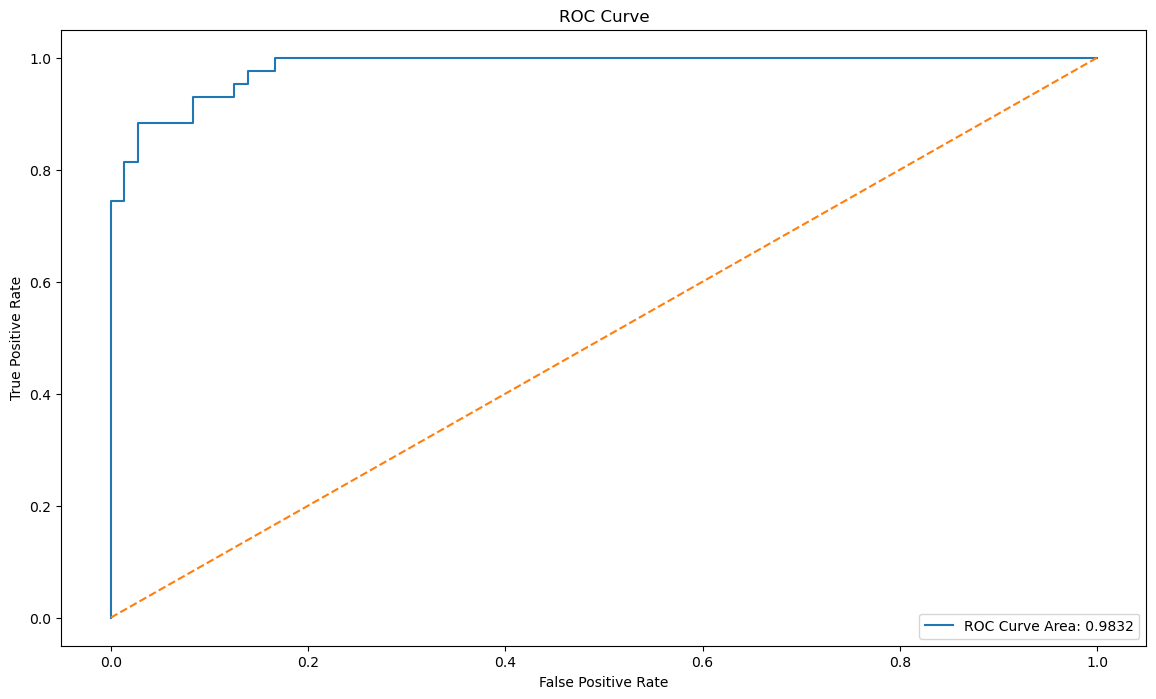



Model Summary for Training Set:
Confusion Matrix is: 
[[69  3]
 [ 5 38]]


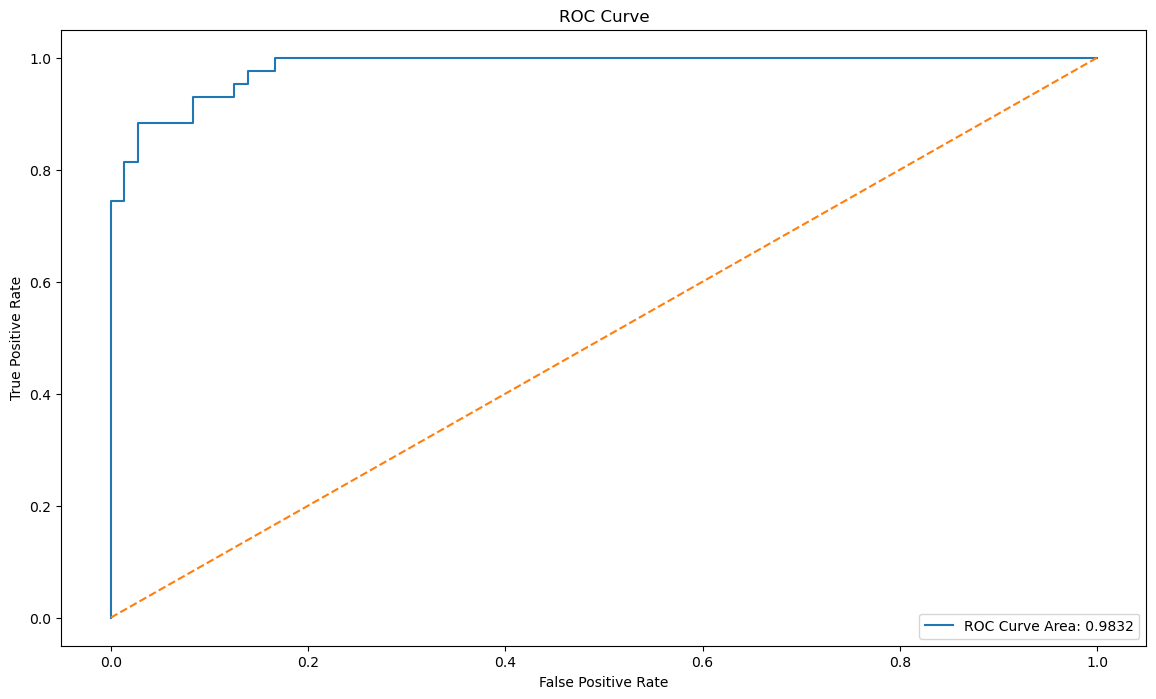

In [16]:
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# now use the function for the Supervised Learning:
algorithm = 'supervised'
Monte_Carlo_Iteration(WDBC_data, 30, algorithm)

<h4><strong>Semi-Supervised Learning/Self-training</strong></h4>

- Use 50% of each class in training as labeled data, the rest as unlabeled.
- Train L1-penalized SVM on labeled data, then incrementally add unlabeled data.
- Report average metrics, plot ROC, and show confusion matrix for one run.

In [17]:
# conduce the new requirement in a new function to return the trained LinearSVC model
def Semi_Supervised(X_train, Y_train, settings):
    labeled_idx = []
    unlabeled_idx = []
    
    for c in [0, 1]:
        c_idx, = np.where(Y_train == c)
        idx_num = round(len(c_idx) * 0.5)
        select_idx = np.random.choice(c_idx, idx_num, replace=False)
        labeled_idx.extend(select_idx)
    
    for i in range(len(X_train)):
        if i not in labeled_idx:
            unlabeled_idx.append(i)

    labeledX = X_train.iloc[labeled_idx].to_numpy().tolist()
    labeledY = Y_train.iloc[labeled_idx].to_numpy().tolist()
    unlabeledX = X_train.iloc[unlabeled_idx].to_numpy().tolist()
    unlabeledY = Y_train.iloc[unlabeled_idx].to_numpy().tolist()
    
    clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
    clf.fit(labeledX, labeledY)
    
    while len(unlabeledX) > 0:
        scores = clf.decision_function(unlabeledX)
        sorted_idx = sorted([i for i in range(len(unlabeledX))], 
                            key=lambda x : abs(scores[x]))
        unlabeledX = [unlabeledX[i] for i in sorted_idx]
        unlabeledY = [unlabeledY[i] for i in sorted_idx]
        
        labeledX.append(unlabeledX.pop())
        labeledY.append(unlabeledY.pop())
        clf.best_estimator_.fit(labeledX, labeledY)
    
    return clf

Iteration: 1 | Training Accuracy: 0.9304 | Testing Accuracy: 0.9207 | Best parameter setting: {'C': 10, 'max_iter': 1000000}

Iteration: 2 | Training Accuracy: 0.9304 | Testing Accuracy: 0.9207 | Best parameter setting: {'C': 10, 'max_iter': 1000000}

Iteration: 3 | Training Accuracy: 0.9304 | Testing Accuracy: 0.9207 | Best parameter setting: {'C': 10, 'max_iter': 1000000}

Iteration: 4 | Training Accuracy: 0.9304 | Testing Accuracy: 0.9207 | Best parameter setting: {'C': 10, 'max_iter': 1000000}

Iteration: 5 | Training Accuracy: 0.9304 | Testing Accuracy: 0.9207 | Best parameter setting: {'C': 10, 'max_iter': 1000000}

Iteration: 6 | Training Accuracy: 0.9304 | Testing Accuracy: 0.9207 | Best parameter setting: {'C': 10, 'max_iter': 1000000}

Iteration: 7 | Training Accuracy: 0.9304 | Testing Accuracy: 0.9229 | Best parameter setting: {'C': 100, 'max_iter': 1000000}

Iteration: 8 | Training Accuracy: 0.9304 | Testing Accuracy: 0.9229 | Best parameter setting: {'C': 100, 'max_iter': 

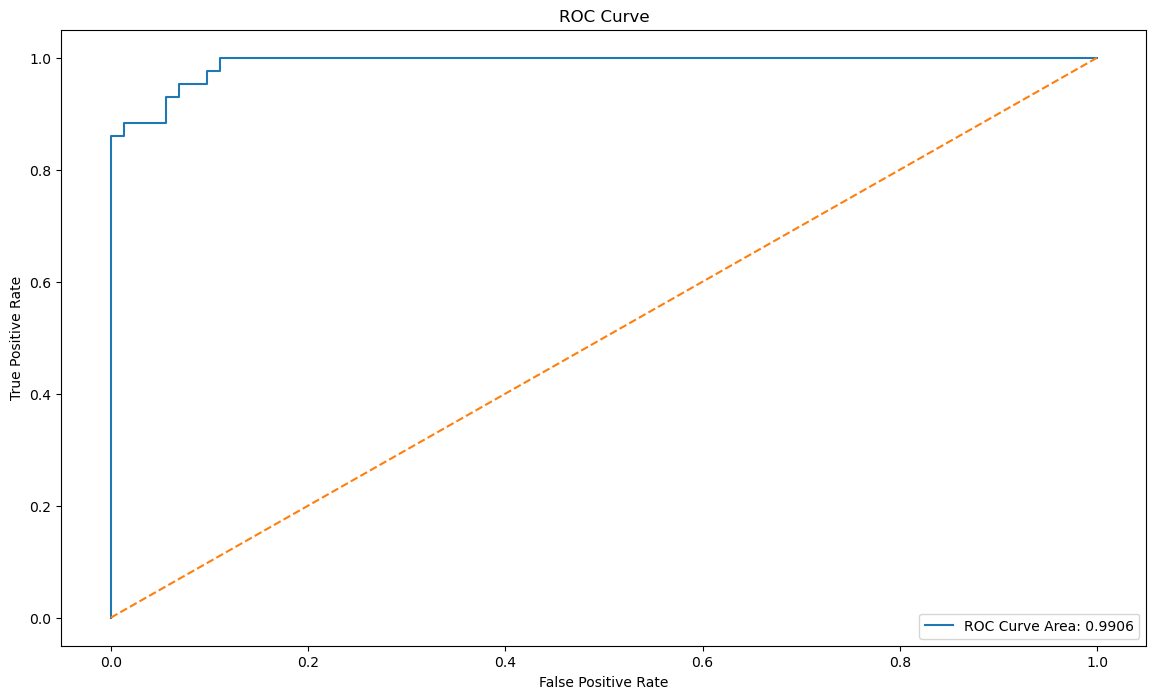



Model Summary for Training Set:
Confusion Matrix is: 
[[68  4]
 [ 4 39]]


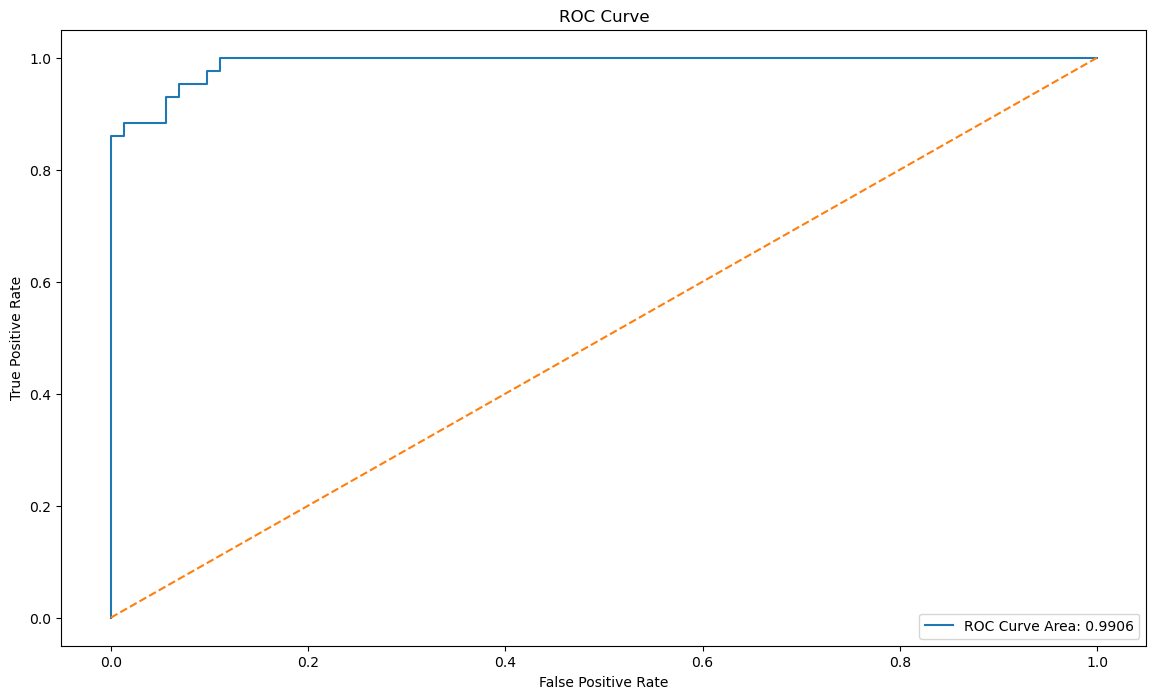

In [18]:
algo = 'semi_supervised'
Monte_Carlo_Iteration(WDBC_data, 30, algo)

<h4><strong>Unsupervised Learning</strong></h4>

- Run k-means algorithm on training set assuming k=2.
- Identify cluster centers, use closest 30 data points for majority polling.
- Report average metrics and confusion matrix for one run.
- Classify test data based on proximity to cluster centers.

- I use a large number of iterations and set each run of the k-means algorithm with a different set of initial points to make sure the algorithm was not trapped in a local minimum.

In [19]:
# splits the given data into training and testing sets, ensuring that the random initialization of the 
# k-means algorithm is not biased. It does this by randomly selecting a subset of data points for testing 
# while keeping the remaining points for training
def random_split(data, randState, test_size=0.2):
    np.random.seed(randState)
    
    # Separate indices for benign and malignant labels
    b_idx = data[data['label'] == 0].index
    m_idx = data[data['label'] == 1].index

    # Randomly select test indices for both classes
    b_test_idx = np.random.choice(b_idx, round(len(b_idx) * test_size), replace=False)
    m_test_idx = np.random.choice(m_idx, round(len(m_idx) * test_size), replace=False)
    
    # Combine test indices for the final test set
    test_idx = np.concatenate([b_test_idx, m_test_idx])
    
    # Create the training set indices
    train_idx = data.index.difference(test_idx)
    
    # Extract features and labels for training and testing sets
    X_train = data.loc[train_idx, data.columns[2:]].copy()
    Y_train = data.loc[train_idx, 'label'].copy()
    X_test = data.loc[test_idx, data.columns[2:]].copy()
    Y_test = data.loc[test_idx, 'label'].copy()
    
    return X_train, Y_train, X_test, Y_test


In [22]:
# a function to calculate the distance 
def distance(centers, X, cluster_label):
    # computes the Euclidean distance between each data point in the input matrix X and 
    # the centroid of its assigned cluster
    dist = np.ndarray((X.shape[0],))
    # calculates the probability of each data point belonging to each cluster 
    # based on the distance from the cluster centroids
    proba = np.ndarray((X.shape[0], 2))
    for i, x in enumerate(X):
        center = centers[cluster_label[i]]
        dist[i] = np.linalg.norm(x - center)
        proba[i, 0] = np.linalg.norm(x - centers[0])
        proba[i, 1] = np.linalg.norm(x - centers[1])
    proba = softmax(proba, axis=1).astype(np.float64)
    return dist, proba

#  a function to computing the majority label for each cluster 
def majority(cluster_label, dist, Y):
    label_to_cluster = np.ndarray((2,), dtype='int')
    major_label = cluster_label.copy()
    for cluster in [0, 1]:
        sample_idx, = np.where(cluster_label == cluster)
        top30 = sorted(sample_idx.tolist(), key=lambda i : dist[i])[:30]
        majority = Y.iloc[top30].value_counts().index[0]
        major_label[sample_idx] = majority
        label_to_cluster[majority] = cluster
    return label_to_cluster, major_label

# get the evaluation stats
def unsupervised_evaluation(fact, predict, prob, report):
    acc = report['accuracy']
    fpr, tpr, thresholds = roc_curve(fact, prob, pos_label=1)
    roc_auc = round(auc(fpr, tpr), 4)
    return {
        'acc' : acc,
        'precision' : report['weighted avg']['precision'],
        'recall' : report['weighted avg']['recall'],
        'f1-score' : report['weighted avg']['f1-score'],
        'auc' : roc_auc
    }

In [25]:
def Monte_Carlo_Unsupervised(data, n, algo):
    cols = ['acc', 'precision', 'recall', 'f1-score', 'auc']
    unsuper_train_df = pd.DataFrame(columns=cols)
    unsuper_test_df = pd.DataFrame(columns=cols)
    
    for i in range(n):
        X_train, Y_train, X_test, Y_test = random_split(data, randState=i, test_size=0.2)
        # normalize x_train and x_test
        scaler = Normalizer()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # for the kmeans clustering algorithm
        if algo == 'unsupervised_kmeans':
            clusterer = KMeans(n_clusters=2, n_init =15, random_state=i).fit(X_train)
            # kmeans clustering training
            train_cluster_label = clusterer.predict(X_train)
            
            # use the distance function to get the distances 
            centers = clusterer.cluster_centers_
            dist, Y_train_pred_prob = distance(centers, X_train, train_cluster_label)
            # use the majority function to get the majority label 
            label_to_cluster, Y_train_pred = majority(train_cluster_label, dist, Y_train)
        
        # for the spectual clustering algorithm
        elif algo == 'unsupervised_spectral':
            cluster_label = SpectralClustering(n_clusters=2, 
                                               assign_labels='kmeans', 
                                               affinity='rbf', 
                                               eigen_tol = 1e-2, 
                                               eigen_solver = 'arpack', 
                                               random_state=0).fit_predict(X_train)
            cluster_centers = []
            for cluster in [0,1]:
                cluster_centers.append(np.mean(X_train[cluster_label==cluster], axis = 0).tolist())

            # build a KNN classifier
            knn = KNeighborsClassifier(n_neighbors=1)
            knn.fit(X_train, cluster_label)
            
            # training
            train_cluster_label = knn.predict(X_train)
            dist, Y_train_pred_prob = distance(cluster_centers, X_train, train_cluster_label)
            label_to_cluster, Y_train_pred = majority(train_cluster_label, dist, Y_train)

        positive_cluster = label_to_cluster[0]
        # make prefiction and get the evaluation stats for taining data
        Y_train_pred_prob = Y_train_pred_prob[:, positive_cluster]
        train_report = classification_report(Y_train, Y_train_pred, output_dict=True)
        tmp_train_result = unsupervised_evaluation(Y_train, Y_train_pred, Y_train_pred_prob, train_report)
        unsuper_train_df = pd.concat([unsuper_train_df, pd.DataFrame([tmp_train_result])], ignore_index=True)

        
        # for testing data 
        if algo == 'unsupervised_kmeans':
            test_cluster_label = clusterer.predict(X_test)
            centers = clusterer.cluster_centers_
            dist, Y_test_pred_prob = distance(centers, X_test, test_cluster_label)
        elif algo == 'unsupervised_spectral':
            test_cluster_label = knn.predict(X_test)
            dist, Y_test_pred_prob = distance(cluster_centers, X_test, test_cluster_label)
            
        label_to_cluster_test, Y_test_pred = majority(test_cluster_label, dist, Y_test)
        positive_cluster_test = label_to_cluster_test[0]
        Y_test_pred_prob = Y_test_pred_prob[:, positive_cluster_test]
        test_report = classification_report(Y_test, Y_test_pred, output_dict=True)
        tmp_test_result = unsupervised_evaluation(Y_test, Y_test_pred, Y_test_pred_prob, test_report)
        unsuper_test_df = pd.concat([unsuper_test_df, pd.DataFrame([tmp_test_result])], ignore_index=True)
        
        train_accuracy = train_report['accuracy']
        test_accuracy = test_report['accuracy']
        print(f'Iteration: {i + 1} | Training Accuracy: {round(train_accuracy, 4)} | Testing Accuracy: {round(test_accuracy, 4)}\n')
    

    # report average stats
    print('\n')
    print("Average Stats for all 30 times:")
    train_result_unsuper = unsuper_train_df.apply(lambda x: x.mean(), axis=0)
    test_result_unsuper = unsuper_test_df.apply(lambda x: x.mean(), axis=0)
    data = [train_result_unsuper, test_result_unsuper]
    summary = pd.concat(data, axis=1)
    summary = summary.T
    summary = summary.set_index(pd.Series(['train', 'test']))
    print(summary)

    print('\n')
    print(f"Model Summary for Training Set:")
    model_summary(Y_train, Y_train_pred, Y_train_pred_prob)
    print(f"Model Summary for Testing Set:")
    model_summary(Y_test, Y_test_pred, Y_test_pred_prob)

Iteration: 1 | Training Accuracy: 0.8882 | Testing Accuracy: 0.8761

Iteration: 2 | Training Accuracy: 0.8728 | Testing Accuracy: 0.9558

Iteration: 3 | Training Accuracy: 0.8969 | Testing Accuracy: 0.8496

Iteration: 4 | Training Accuracy: 0.886 | Testing Accuracy: 0.9115

Iteration: 5 | Training Accuracy: 0.8991 | Testing Accuracy: 0.8761

Iteration: 6 | Training Accuracy: 0.886 | Testing Accuracy: 0.8673

Iteration: 7 | Training Accuracy: 0.8794 | Testing Accuracy: 0.8938

Iteration: 8 | Training Accuracy: 0.886 | Testing Accuracy: 0.8673

Iteration: 9 | Training Accuracy: 0.8882 | Testing Accuracy: 0.8584

Iteration: 10 | Training Accuracy: 0.8816 | Testing Accuracy: 0.8938

Iteration: 11 | Training Accuracy: 0.8925 | Testing Accuracy: 0.8761

Iteration: 12 | Training Accuracy: 0.8794 | Testing Accuracy: 0.9115

Iteration: 13 | Training Accuracy: 0.8816 | Testing Accuracy: 0.9027

Iteration: 14 | Training Accuracy: 0.8882 | Testing Accuracy: 0.8938

Iteration: 15 | Training Accurac

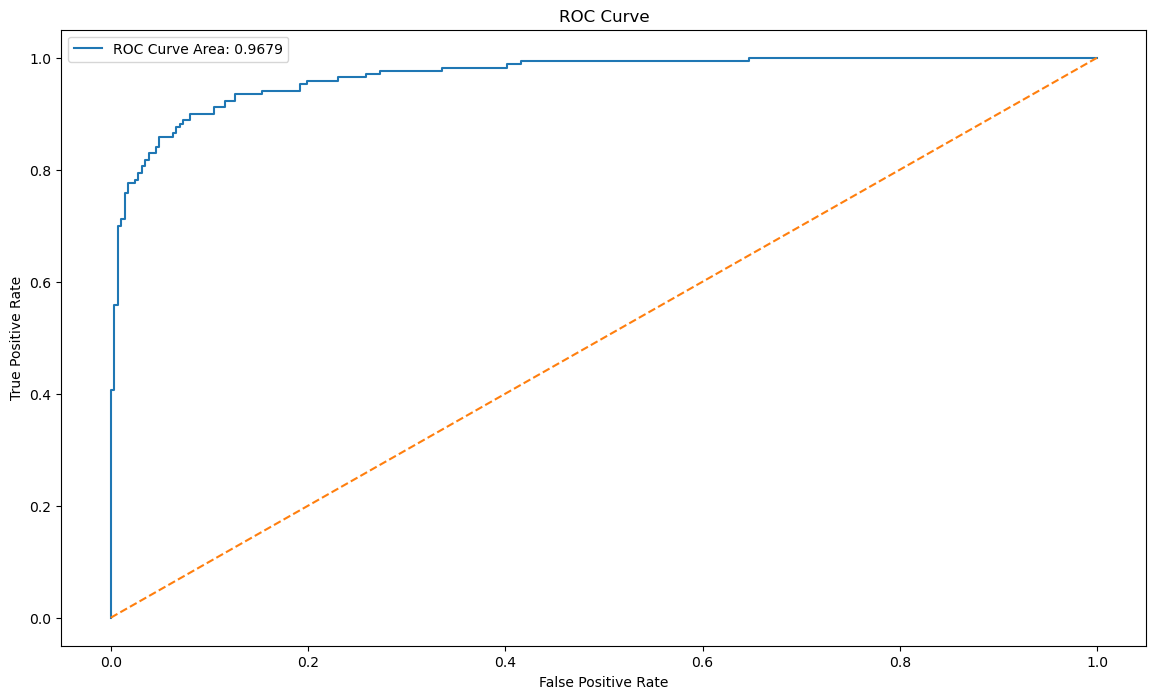

Model Summary for Testing Set:
Confusion Matrix is: 
[[70  1]
 [17 25]]


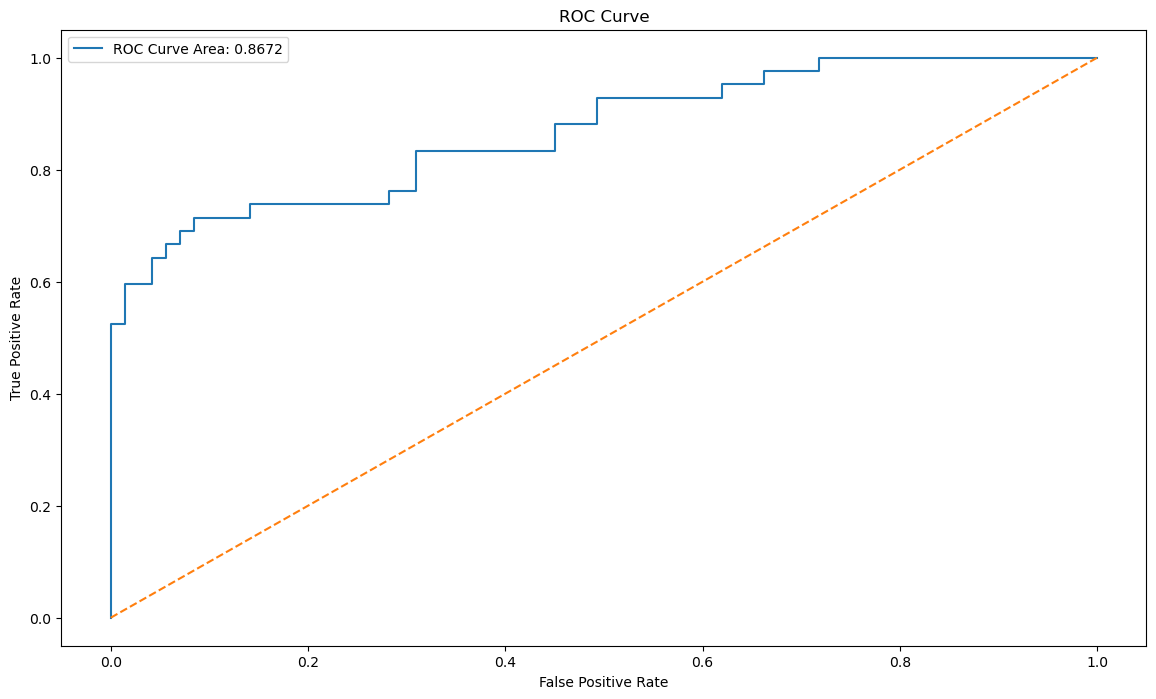

In [26]:
algo = 'unsupervised_kmeans'
Monte_Carlo_Unsupervised(WDBC_data, 30, algo)

<h4><strong>Spectral Clustering</strong></h4>

- Similar to Unsupervised Learning, but with spectral clustering using RBF kernel.
- Focus on clusters' balance in terms of data points.
- Use fit-predict method for labeling.
- Compare and analyze results with other methods.

Iteration: 1 | Training Accuracy: 0.886 | Testing Accuracy: 0.885

Iteration: 2 | Training Accuracy: 0.8684 | Testing Accuracy: 0.9204

Iteration: 3 | Training Accuracy: 0.8925 | Testing Accuracy: 0.8407

Iteration: 4 | Training Accuracy: 0.8794 | Testing Accuracy: 0.8761

Iteration: 5 | Training Accuracy: 0.8838 | Testing Accuracy: 0.8761

Iteration: 6 | Training Accuracy: 0.8838 | Testing Accuracy: 0.8761

Iteration: 7 | Training Accuracy: 0.8728 | Testing Accuracy: 0.8938

Iteration: 8 | Training Accuracy: 0.8838 | Testing Accuracy: 0.8496

Iteration: 9 | Training Accuracy: 0.886 | Testing Accuracy: 0.8496

Iteration: 10 | Training Accuracy: 0.8772 | Testing Accuracy: 0.8761

Iteration: 11 | Training Accuracy: 0.8904 | Testing Accuracy: 0.8496

Iteration: 12 | Training Accuracy: 0.8794 | Testing Accuracy: 0.8938

Iteration: 13 | Training Accuracy: 0.8794 | Testing Accuracy: 0.8938

Iteration: 14 | Training Accuracy: 0.8794 | Testing Accuracy: 0.885

Iteration: 15 | Training Accuracy

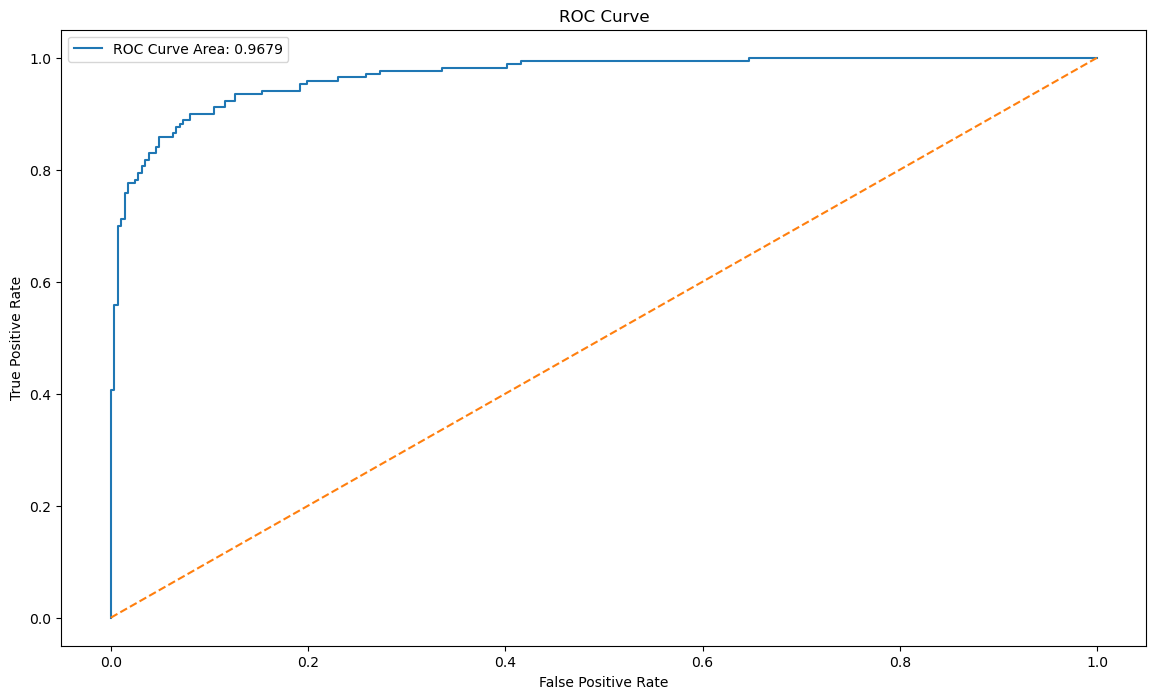

Model Summary for Testing Set:
Confusion Matrix is: 
[[69  2]
 [18 24]]


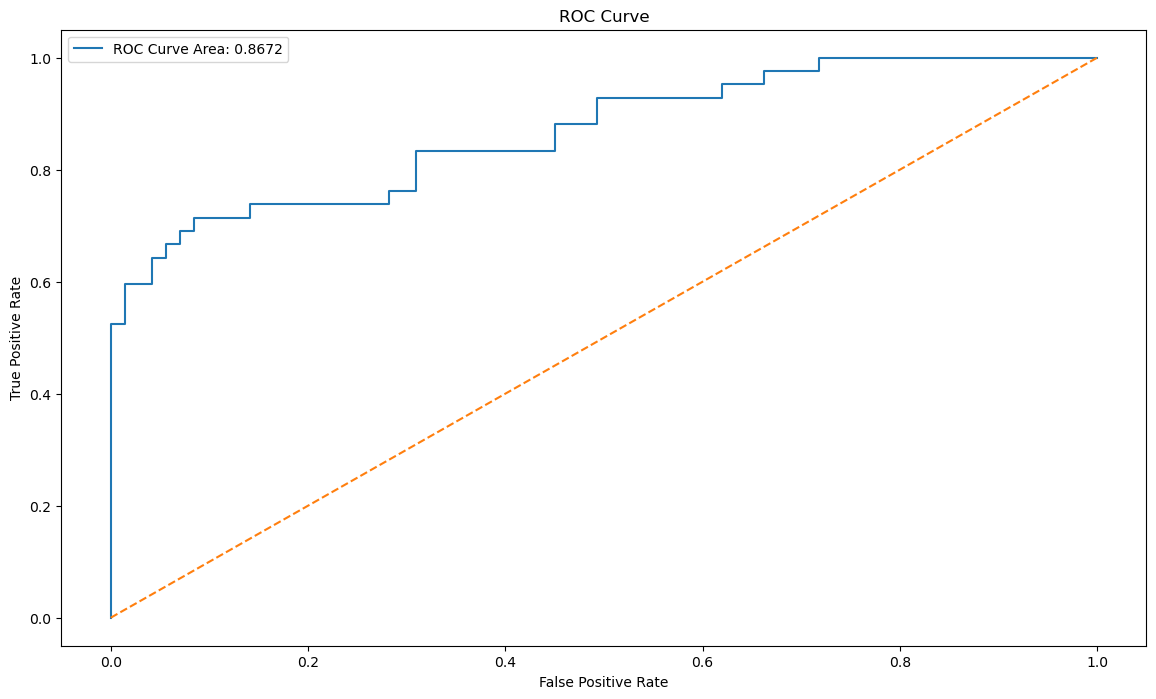

In [27]:
algo = 'unsupervised_spectral'
Monte_Carlo_Unsupervised(WDBC_data, 30, algo)

<h4><strong>Method Comparison</strong></h4>

Examining the summarization outcomes, the performance order is Supervised > Semi-Supervised > Unsupervised. The distinction is more marked between semi-supervised and unsupervised compared to supervised and semi-supervised, which is expected because supervised methods have more labeled data for guidance than semi-supervised methods do. Similarly, unsupervised relies on feature similarity for predictions, resulting in lower performance compared to both supervised and semi-supervised approaches.

## 2. Active Learning Using Support Vector Machines

<h4><strong>Data Acquisition</strong></h4>

- Download the banknote authentication Data Set.
- Use 472 data points for testing and 900 for training.

In [2]:
banknote = "../data/data_banknote_authentication.txt"

banknote_df = pd.read_csv(banknote, header=None)
banknote_df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
banknote_df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
banknote_df['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [4]:
# Choose 472 data points randomly as the test set, and the remaining 900 points as the training set
train_num = 900
test_num = 472

test_idx = np.random.choice(banknote_df.shape[0], test_num, replace=False)

the_rest = []
for i in range(banknote_df.shape[0]):
    if i not in test_idx:
        the_rest.append(i);

train_idx = np.array(the_rest)

In [5]:
banknote_train = banknote_df.iloc[train_idx]
banknote_test = banknote_df.iloc[test_idx]

In [6]:
banknote_train

,variance,skewness,curtosis,entropy,class
1,4.54590,8.16740,-2.45860,-1.46210,0
2,3.86600,-2.63830,1.92420,0.10645,0
3,3.45660,9.52280,-4.01120,-3.59440,0
4,0.32924,-4.45520,4.57180,-0.98880,0
6,3.59120,3.01290,0.72888,0.56421,0
...,...,...,...,...,...
1366,-2.41000,3.74330,-0.40215,-1.29530,1
1367,0.40614,1.34920,-1.45010,-0.55949,1
1368,-1.38870,-4.87730,6.47740,0.34179,1
1369,-3.75030,-13.45860,17.59320,-2.77710,1


In [7]:
banknote_test

,variance,skewness,curtosis,entropy,class
1247,-4.47750,-13.0303,17.0834,-3.03450,1
888,-2.57010,-6.8452,8.9999,2.13530,1
160,5.04520,3.8964,-1.4304,0.86291,0
689,3.02420,-3.3378,2.5865,-0.54785,0
924,1.59040,2.2121,-3.1183,-0.11725,1
...,...,...,...,...,...
369,2.19480,1.3781,1.1582,0.85774,0
196,4.14540,7.2570,-1.9153,-0.86078,0
817,-2.58800,3.8654,-0.3336,-1.27970,1
919,0.89512,4.7738,-4.8431,-5.59090,1


<h4><strong>Learning Procedures</strong></h4>

- Repeat two procedures 50 times each.

In [8]:
def data_split():    
    train_dp = 900
    test_dp = 472

    test_idx = np.random.choice(banknote_df.shape[0], test_dp, replace=False)

    temp_list = []
    for i in range(banknote_df.shape[0]):
        if i not in test_idx:
            temp_list.append(i);

    train_idx = np.array(temp_list)
    return {
        'train_idx': train_idx,
        'test_idx': test_idx,
    }

In [9]:
def normalized_data(x_train, x_test):    
    normalizer = Normalizer()
    x_train_normalized = normalizer.fit_transform(x_train)
    x_test_normalized = normalizer.fit_transform(x_test)
    return pd.DataFrame(x_train_normalized), pd.DataFrame(x_test_normalized)

In [10]:
def passive(trainX, trainY, testX, testY, settings):
    used_idx = []
    acc_list = []
    
    while len(used_idx) < trainX.shape[0]:
        touse_idx = np.setdiff1d(np.arange(trainX.shape[0]), used_idx)
        np.random.shuffle(touse_idx)
        
        pool = touse_idx[:10]
        used_idx.extend(pool)
        
        used_trainX, used_trainY = trainX.iloc[used_idx], trainY.iloc[used_idx]
        
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
        clf.fit(used_trainX, used_trainY)
        
        testPredY = clf.predict(testX)
        testReport = classification_report(testY, testPredY, output_dict=True)
        acc_list.append(testReport['accuracy'])
    
    return acc_list

def active(trainX, trainY, testX, testY, settings):
    used_idx = []
    acc_list = []
    
    while len(used_idx) <= 900:
        touse_idx = np.setdiff1d(np.arange(trainX.shape[0]), used_idx)
        np.random.shuffle(touse_idx)
        
        pool = touse_idx[:10]
        used_idx.extend(pool)
        
        used_trainX, used_trainY = trainX.iloc[used_idx], trainY.iloc[used_idx]
        
        if used_trainY.empty:  # Check if used_trainY is empty
            print(f"Warning: used_trainY is empty in iteration {len(acc_list) + 1}. Skipping iteration.")
            continue
        
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
        clf.fit(used_trainX, used_trainY)
        
        testPredY = clf.predict(testX)
        testReport = classification_report(testY, testPredY, output_dict=True)
        acc_list.append(testReport['accuracy'])
        
        if len(used_idx) == trainX.shape[0]:
            break
        
        dist = clf.decision_function(trainX.iloc[~np.isin(np.arange(trainX.shape[0]), used_idx)])
        sortedarg = np.argpartition(np.abs(dist), 10)[:10]
        used_idx.extend(sortedarg)
    
    return acc_list


def monte_carlo_SVM(data, n, algo):
    np.random.seed(42)  # Set a random seed for reproducibility
    max_iter_values = [1000000, 5000000, 10000000]
    tuned_params = {'C': [1, 10, 100], 'max_iter': max_iter_values}
    kwargs = {
        'param_grid' : tuned_params, 
        'scoring' : 'f1_weighted',
        'n_jobs' : -1,
        'verbose' : 0
    }
    
    learning_curve = []
    
    for i in range(n):
        index = data_split()
        train_idx, test_idx = index['train_idx'], index['test_idx']
        
        train_set, test_set = data.iloc[train_idx], data.iloc[test_idx]
        trainX, trainY = train_set.iloc[:, :-1], train_set.iloc[:, -1]
        testX, testY = test_set.iloc[:, :-1], test_set.iloc[:, -1]
        trainX, testX = normalized_data(trainX, testX)
        kwargs['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
        
        if algo == 'passive':
            acc_list = passive(trainX, trainY, testX, testY, kwargs)
        elif algo == 'active':
            acc_list = active(trainX, trainY, testX, testY, kwargs)
        
        print(f"Iteration {i + 1} | Test accuracy (10 samples): {round(acc_list[0], 4)} | Test accuracy (20 samples): {round(acc_list[1], 4)} |...| Test accuracy (890 samples): {round(acc_list[-2], 4)} | Test accuracy (900 samples): {round(acc_list[-1], 4)}")
        learning_curve.append(acc_list)
    
    learning_curve = np.mean(np.array(learning_curve), axis=0)
    

    return learning_curve


<h4><strong>Passive Learning</strong></h4>

- Train SVM with 10 random data points, incrementally adding data.
- Use linear kernel, L1 penalty, and 5-fold cross-validation.
- Calculate test error for each SVM.

In [11]:
passive_curve = monte_carlo_SVM(banknote_df, 50, 'passive')

Iteration 1 | Test accuracy (10 samples): 0.9852 | Test accuracy (20 samples): 0.9725 |...| Test accuracy (890 samples): 0.9894 | Test accuracy (900 samples): 0.9894
Iteration 2 | Test accuracy (10 samples): 0.8898 | Test accuracy (20 samples): 0.928 |...| Test accuracy (890 samples): 0.9936 | Test accuracy (900 samples): 0.9936
Iteration 3 | Test accuracy (10 samples): 0.7627 | Test accuracy (20 samples): 0.9703 |...| Test accuracy (890 samples): 0.9958 | Test accuracy (900 samples): 0.9958
Iteration 4 | Test accuracy (10 samples): 0.839 | Test accuracy (20 samples): 0.8835 |...| Test accuracy (890 samples): 0.9958 | Test accuracy (900 samples): 0.9958
Iteration 5 | Test accuracy (10 samples): 0.8538 | Test accuracy (20 samples): 0.8708 |...| Test accuracy (890 samples): 0.9958 | Test accuracy (900 samples): 0.9958
Iteration 6 | Test accuracy (10 samples): 0.8941 | Test accuracy (20 samples): 0.9809 |...| Test accuracy (890 samples): 0.9958 | Test accuracy (900 samples): 0.9958
Iterat

<h4><strong>Active Learning</strong></h4>

- Start with 10 random data points.
- Add 10 closest points to the hyperplane in each iteration.
- Calculate test error for each SVM.

In [12]:
active_curve = monte_carlo_SVM(banknote_df, 50, 'active')

Iteration 1 | Test accuracy (10 samples): 0.9852 | Test accuracy (20 samples): 0.9831 |...| Test accuracy (890 samples): 0.9958 | Test accuracy (900 samples): 0.9958
Iteration 2 | Test accuracy (10 samples): 0.8623 | Test accuracy (20 samples): 0.9852 |...| Test accuracy (890 samples): 1.0 | Test accuracy (900 samples): 1.0
Iteration 3 | Test accuracy (10 samples): 0.8411 | Test accuracy (20 samples): 0.9619 |...| Test accuracy (890 samples): 0.9979 | Test accuracy (900 samples): 0.9979
Iteration 4 | Test accuracy (10 samples): 0.9068 | Test accuracy (20 samples): 0.964 |...| Test accuracy (890 samples): 0.9915 | Test accuracy (900 samples): 0.9894
Iteration 5 | Test accuracy (10 samples): 0.6886 | Test accuracy (20 samples): 0.9831 |...| Test accuracy (890 samples): 0.9936 | Test accuracy (900 samples): 0.9936
Iteration 6 | Test accuracy (10 samples): 0.8898 | Test accuracy (20 samples): 0.9428 |...| Test accuracy (890 samples): 0.9936 | Test accuracy (900 samples): 0.9936
Iteration 7

<h4><strong>Analysis</strong></h4>

- Average the 50 test errors for each SVM.
- Plot average test error against number of training instances for both active and passive learning.
- Analyze and report conclusions from the learning curve obtained through Monte Carlo simulation.

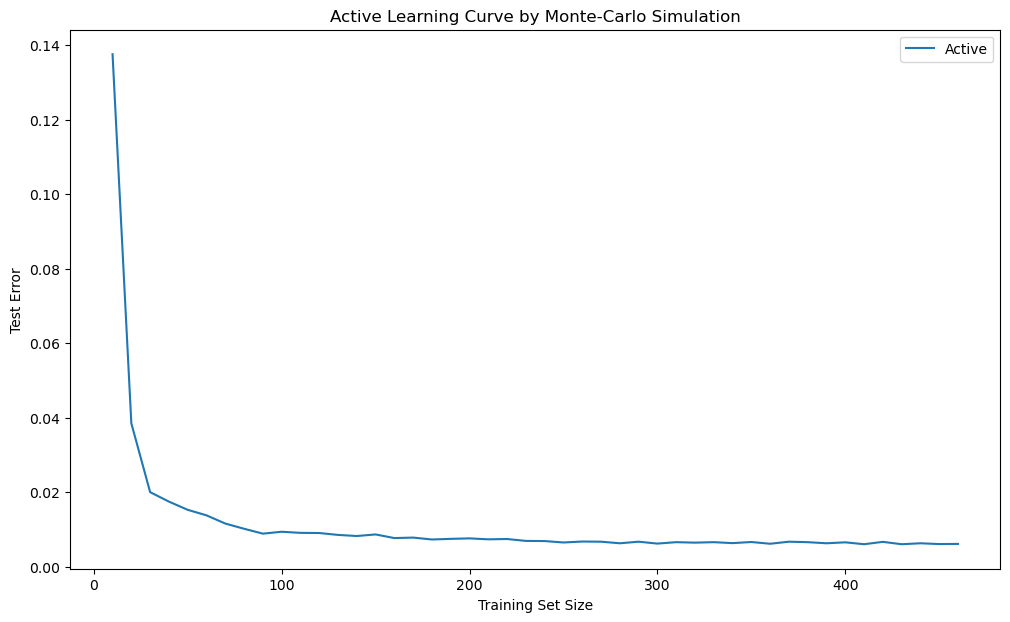

In [17]:
# active learning curve
fig, axes = plt.subplots(figsize=(12, 7))
axes.set_title("Active Learning Curve by Monte-Carlo Simulation")
x = 10 * np.arange(1, len(active_curve) + 1)
axes.plot(x, 1 - active_curve, label='Active')
axes.set_xlabel("Training Set Size")
axes.set_ylabel("Test Error")
axes.legend()
plt.show()

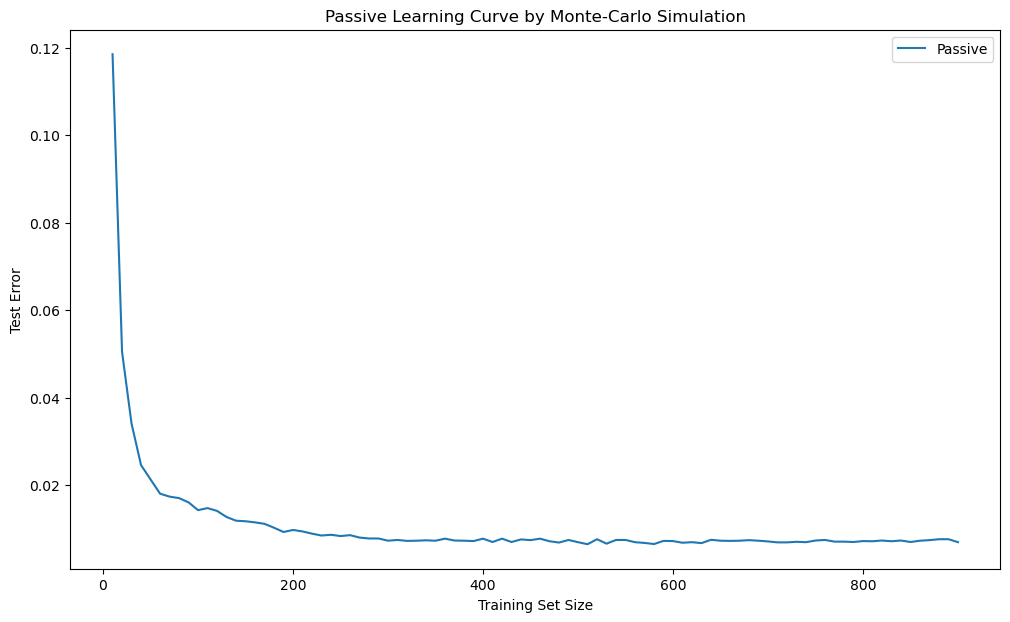

In [18]:
# passive learning curve
fig, axes = plt.subplots(figsize=(12, 7))
axes.set_title("Passive Learning Curve by Monte-Carlo Simulation")
x = 10 * np.arange(1, len(passive_curve) + 1)
axes.plot(x, 1 - passive_curve, label='Passive')
axes.set_xlabel("Training Set Size")
axes.set_ylabel("Test Error")
axes.legend()
plt.show()